In [1]:
import time
import warnings
from itertools import cycle, islice
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


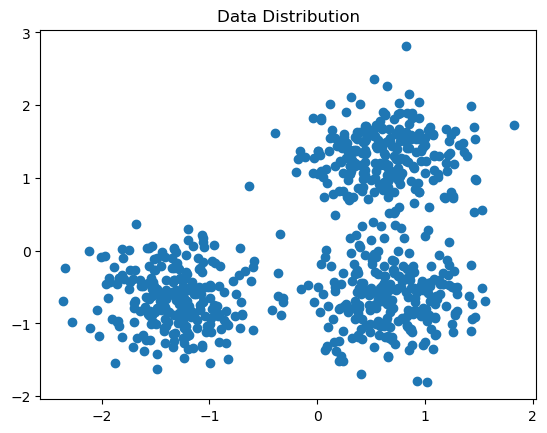

In [2]:
centers = [[1,1],[-1,-1],[1,-1]]
dataset1, labels1 = datasets.make_blobs(
    n_samples=750,
    centers=centers,
    cluster_std=0.4,
    random_state=42
)
dataset1 = StandardScaler().fit_transform(dataset1)
plt.scatter(dataset1[:,0],dataset1[:,1],)
plt.title("Data Distribution")
plt.show()

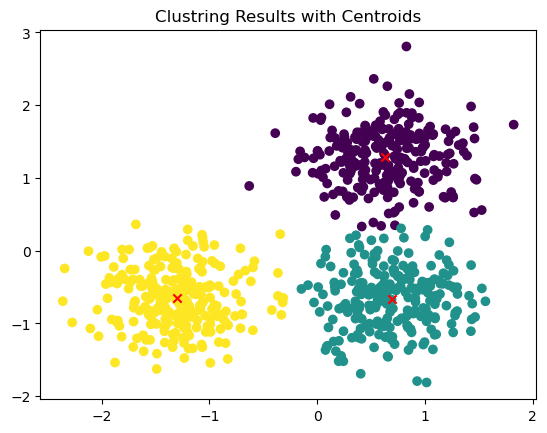

In [3]:
kmeans1 = KMeans(n_clusters=3,random_state=42)
kmeans1.fit(dataset1)

centers = kmeans1.cluster_centers_
labels = kmeans1.labels_
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='o')
plt.scatter(centers[:,0],centers[:,1],c='r',marker='x')
plt.title("Clustring Results with Centroids")
plt.show()

In [4]:
sscore = metrics.silhouette_score(dataset1,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

Silhoute Coefficirnt = 0.638


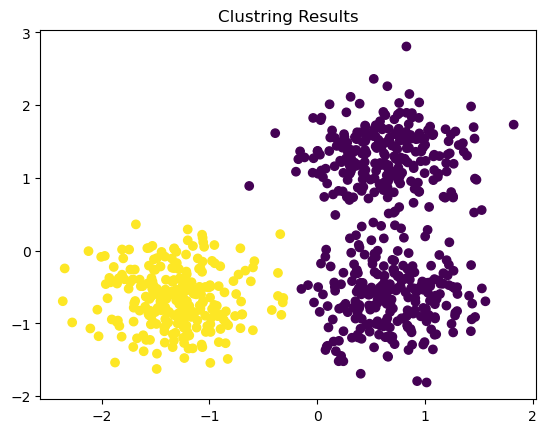

In [10]:
agg1 = AgglomerativeClustering(linkage='ward')
agg1.fit(dataset1)

labels = agg1.labels_
n_cluster = agg1.n_clusters_

plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()

In [11]:
dbscan1 = DBSCAN(eps=0.25,min_samples=10)
dbscan1.fit(dataset1)

labels = dbscan1.labels_

n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# alternate_n = len(set(labels))-n_noise_

print(f"Estimated number of cluster = {n_clusters_}")
print(f"Estimated number of noise_points = {n_noise_}")
# print(alternate_n)

Estimated number of cluster = 2
Estimated number of noise_points = 40
-37


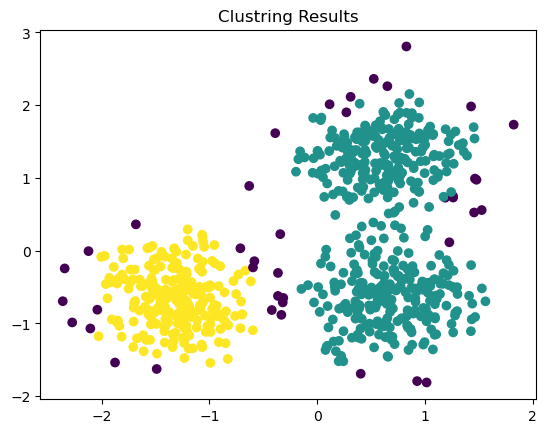

In [12]:
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()

In [13]:
sscore = metrics.silhouette_score(dataset1,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

Silhoute Coefficirnt = 0.407


In [16]:
from sklearn.neighbors import NearestNeighbors

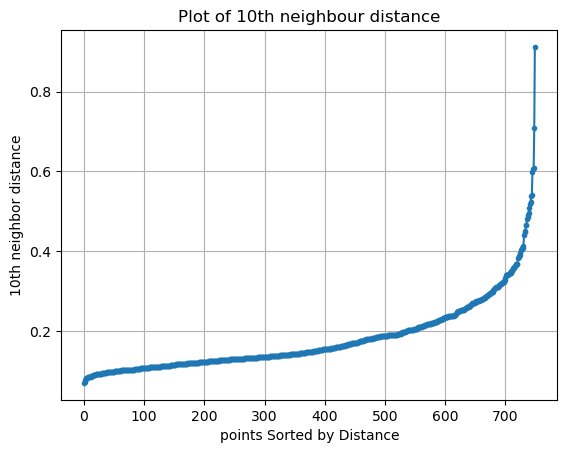

In [17]:
k = 10 #set the value of k (Minpts in DBSCAN)
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(dataset1)

distance, indices = nn_model.kneighbors(dataset1)

k_distance = distance[:,-1]
k_distance_sorted = np.sort(k_distance)

plt.plot(np.arange(len(k_distance_sorted)),k_distance_sorted,marker ='.')
plt.xlabel("points Sorted by Distance")
plt.ylabel(f"{k}th neighbor distance")
plt.title(f"Plot of {k}th neighbour distance")
plt.grid(True)

Estimated number of cluster = 3
Estimated number of noise_points = 102


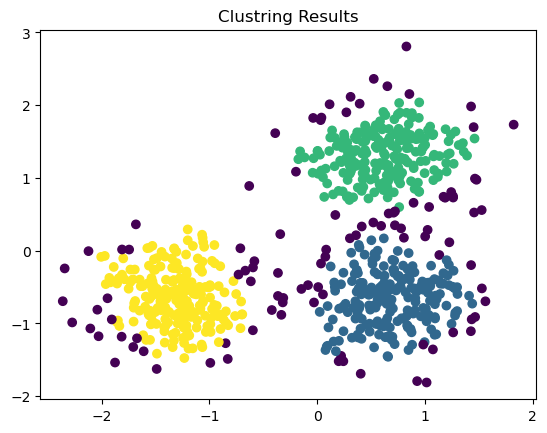

Silhoute Coefficirnt = 0.518


In [27]:
dbscan1 = DBSCAN(eps=0.2,min_samples=10)
dbscan1.fit(dataset1)

labels = dbscan1.labels_

n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# alternate_n = len(set(labels))-n_noise_

print(f"Estimated number of cluster = {n_clusters_}")
print(f"Estimated number of noise_points = {n_noise_}")
# print(alternate_n)
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()
sscore = metrics.silhouette_score(dataset1,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

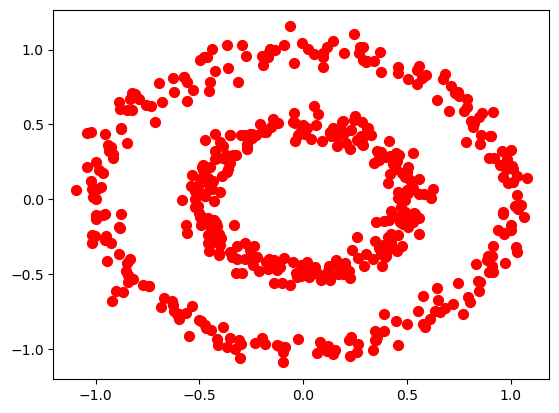

In [28]:
#Dataset 2
n_samples = 500
X,y = datasets.make_circles(
    n_samples=n_samples,
    factor=0.5,
    noise=0.05,
    random_state=42
)
plt.scatter(X[:,0],X[:,1],c='r',s=50,cmap='viridis')
plt.show()

Estimated number of cluster = 2
Estimated number of noise_points = 0


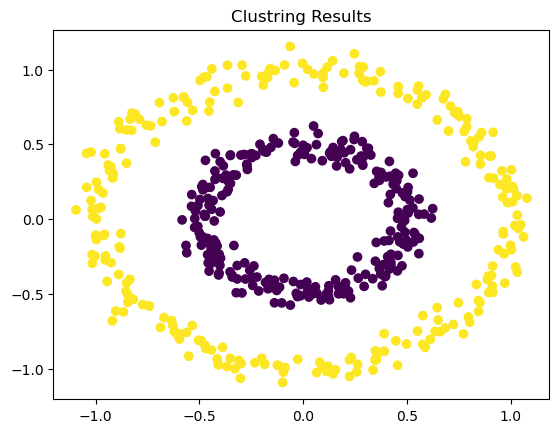

Silhoute Coefficirnt = 0.113


In [34]:
dbscan2 = DBSCAN(eps=0.175,min_samples=10)
dbscan2.fit(X)

labels = dbscan2.labels_

n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# alternate_n = len(set(labels))-n_noise_

print(f"Estimated number of cluster = {n_clusters_}")
print(f"Estimated number of noise_points = {n_noise_}")
# print(alternate_n)
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()
sscore = metrics.silhouette_score(X,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

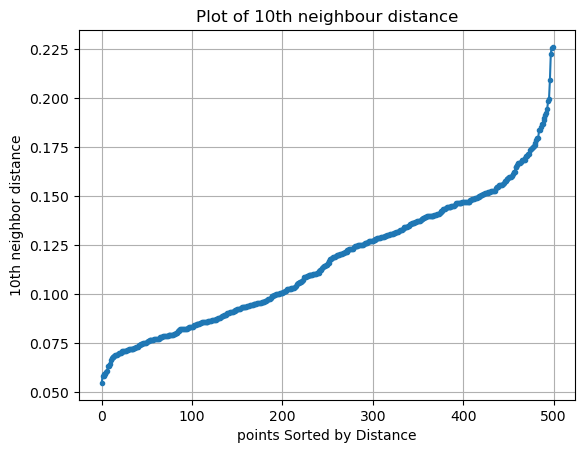

In [33]:
k = 10 #set the value of k (Minpts in DBSCAN)
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(X)

distance, indices = nn_model.kneighbors(X)

k_distance = distance[:,-1]
k_distance_sorted = np.sort(k_distance)

plt.plot(np.arange(len(k_distance_sorted)),k_distance_sorted,marker ='.')
plt.xlabel("points Sorted by Distance")
plt.ylabel(f"{k}th neighbor distance")
plt.title(f"Plot of {k}th neighbour distance")
plt.grid(True)

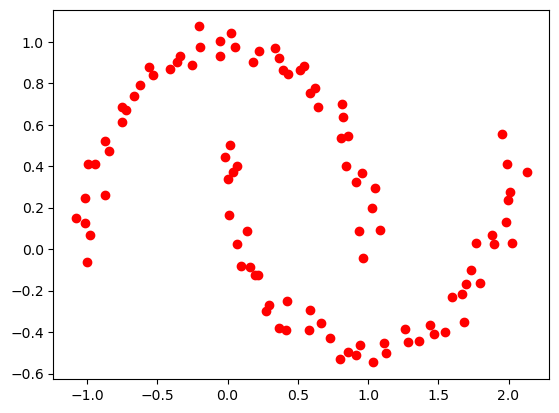

In [38]:
#Dataset 3
X,y = datasets.make_moons(
    n_samples=100,
    noise=0.05,
    random_state=42
)

plt.scatter(X[:,0],X[:,1],c='r',marker='o')
# plt.show()

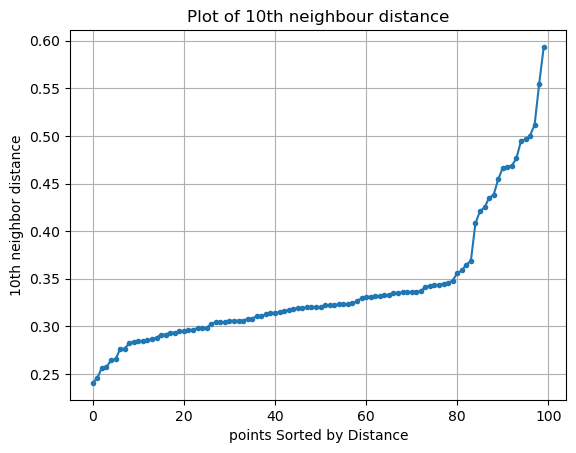

In [39]:
k = 10 #set the value of k (Minpts in DBSCAN)
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(X)

distance, indices = nn_model.kneighbors(X)

k_distance = distance[:,-1]
k_distance_sorted = np.sort(k_distance)

plt.plot(np.arange(len(k_distance_sorted)),k_distance_sorted,marker ='.')
plt.xlabel("points Sorted by Distance")
plt.ylabel(f"{k}th neighbor distance")
plt.title(f"Plot of {k}th neighbour distance")
plt.grid(True)

Estimated number of cluster = 2
Estimated number of noise_points = 0


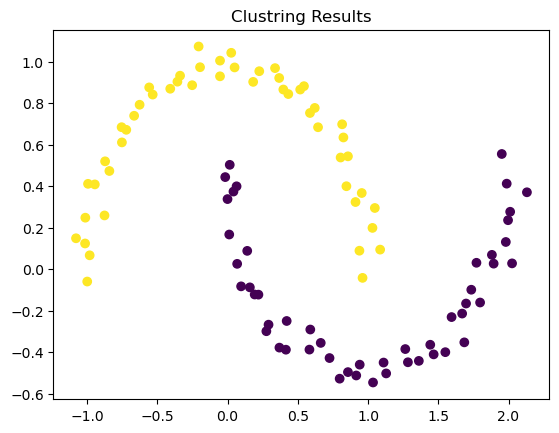

Silhoute Coefficirnt = 0.314


In [55]:
dbscan3 = DBSCAN(eps=0.4,min_samples=10)
dbscan3.fit(X)

labels = dbscan3.labels_

n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# alternate_n = len(set(labels))-n_noise_

print(f"Estimated number of cluster = {n_clusters_}")
print(f"Estimated number of noise_points = {n_noise_}")
# print(alternate_n)
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()
sscore = metrics.silhouette_score(X,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

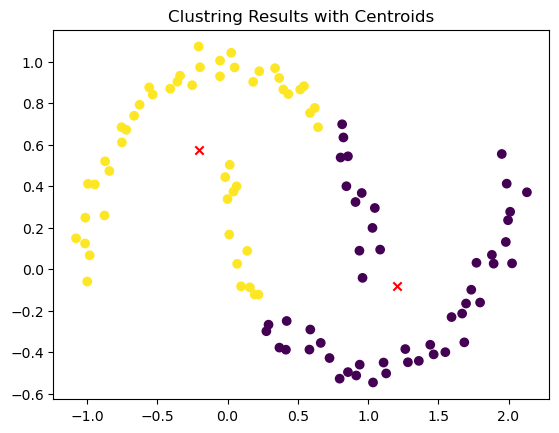

Silhoute Coefficirnt = 0.485


In [51]:
kmeans3 = KMeans(n_clusters=2,random_state=42)
kmeans3.fit(X)

centers = kmeans3.cluster_centers_
labels = kmeans3.labels_
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',marker='o')
plt.scatter(centers[:,0],centers[:,1],c='r',marker='x')
plt.title("Clustring Results with Centroids")
plt.show()
sscore = metrics.silhouette_score(X,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")

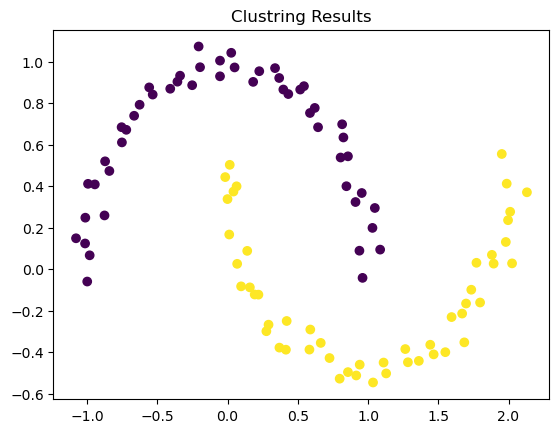

Silhoute Coefficirnt = 0.314


In [52]:
agg3 = AgglomerativeClustering(linkage='single')
agg3.fit(X)

labels = agg3.labels_
n_cluster = agg3.n_clusters_

plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',marker='o')
plt.title("Clustring Results")
plt.show()
sscore = metrics.silhouette_score(X,labels)
print(f"Silhoute Coefficirnt = {sscore:.3f}")